In [16]:
import ROOT
ROOT.gInterpreter.ProcessLine('#include "/software/pc24403/tfpcbpggsz/test/shenghuistyle.h"')
def access_tlist(file_path, stack_name):
    # Open the ROOT file
    file = ROOT.TFile(file_path)
    stack = file.Get(stack_name)
    name_list = []
    amplitude = []
    amplitude_interference = []

    # Check if the object is a THStack
    if isinstance(stack, ROOT.THStack):

        stack_list = stack.GetHists()  # Using GetHists() to retrieve the histogram list

        for hist in stack_list:
            name_list.append(hist.GetName())
            a=hist.GetName().split("D0")
            amp1 = 'D0'+a[1]
            amp2 = 'D0'+a[2][:-3]
            if amp1 == amp2:
                amplitude.append('amp0_'+amp1+amp2)
            else :
                amplitude_interference.append('amp0_'+amp1+amp2)

    amp_name={}
    amp_name['amp'] = {}
    amp_name['interf'] = {}
    amp_name['amp'] = amplitude
    amp_name['interf'] = amplitude_interference

    # Close the file
    file.Close()
    return amp_name


def plot_amp(amp_name, file_path, stack_name):
    # Open the ROOT file
    file = ROOT.TFile(file_path)
    stack = file.Get(stack_name)
    hist_list = []
    for amp in amp_name:
        for hist_name in amp_name[amp]:
            hist = stack.GetStack().FindObject(hist_name)
            hist_list.append(hist)

    # Close the file
    file.Close()
    return hist_list
    



In [2]:
alllist = access_tlist("/software/pc24403/tfpcbpggsz/test/plots.root", "amp0_s02_stack")
amp_name_list = ['K8920','a_2_1320', 'Ks1430', 'Ks_1410', 'rho1450', 'Ks1410', 'a01450', 'rho1700', 'Ks1430', 'K01430', 'K892+']

['amp0_D0_Ks_892_0_Km_pip__K0S0__D0_Ks_892_0_Km_pip__K0S0__', 'amp0_D0_a_2__1320_m_K0S0_Km__pip__D0_a_2__1320_m_K0S0_Km__pip__', 'amp0_D0_K_2_s_1430_0_Km_pip__K0S0__D0_K_2_s_1430_0_Km_pip__K0S0__', 'amp0_D0_Ks_1410_p_K0S0_pip__Km__D0_Ks_1410_p_K0S0_pip__Km__', 'amp0_D0_rho_1450_m_GounarisSakurai__K0S0_Km__pip__D0_rho_1450_m_GounarisSakurai__K0S0_Km__pip__', 'amp0_D0_Ks_1410_0_Km_pip__K0S0__D0_Ks_1410_0_Km_pip__K0S0__', 'amp0_D0_a_0__1450_m_K0S0_Km__pip__D0_a_0__1450_m_K0S0_Km__pip__', 'amp0_D0_rho_1700_m_GounarisSakurai__K0S0_Km__pip__D0_rho_1700_m_GounarisSakurai__K0S0_Km__pip__', 'amp0_D0_K_0_s_1430_0_GLASS__Km_pip__K0S0__D0_K_0_s_1430_0_GLASS__Km_pip__K0S0__', 'amp0_D0_K_0_s_1430_p_GLASS__K0S0_pip__Km__D0_K_0_s_1430_p_GLASS__K0S0_pip__Km__', 'amp0_D0_Ks_892_p_K0S0_pip__Km__D0_Ks_892_p_K0S0_pip__Km__']
['amp0_D0_K_0_s_1430_p_GLASS__K0S0_pip__Km__D0_K_0_s_1430_0_GLASS__Km_pip__K0S0__', 'amp0_D0_Ks_892_p_K0S0_pip__Km__D0_Ks_1410_p_K0S0_pip__Km__', 'amp0_D0_Ks_1410_p_K0S0_pip__Km__D0_K_

In [49]:
var_name = ['s01']
bkg_frac = ['0.2195']
file_name = "/software/pc24403/tfpcbpggsz/test/plots.root"
th1f_amp = {}
th1f_data = {}
th1f_bkg = {}
th1f_pdf = {}

file = ROOT.TFile(file_name)
for var in var_name:
    stack_name = f"amp0_{var}_stack"
    th1f_data[var] = file.Get(f"Data0_{var}")
    th1f_data[var].SetDirectory(0)
    th1f_bkg[var] = file.Get(f'pdf0_AmpGen::BackgroundPdf_{var}')
    th1f_bkg[var].SetDirectory(0) 
    th1f_pdf[var] = file.Get(f'pdf0_AmpGen::CoherentSum_{var}')
    th1f_pdf[var].SetDirectory(0)     

    stacks = file.Get(stack_name)
    th1f_amp[var] = {}
    for amp_i in alllist['amp']:
        print(f"{amp_i}{var}")
        th1f_amp[var][amp_i] = stacks.GetHists().FindObject(f"{amp_i}{var}")
        th1f_amp[var][amp_i].SetDirectory(0)
    stacks.Delete()
file.Close()

valid_bin = {}
chisa = {}

for var in var_name:
    bins_temp =0
    chisa_temp =0
# Loop over the bins of the histogram
    for ibinx in range(1, th1f_data[var].GetNbinsX() + 1):  # ROOT histograms are 1-indexed in bin numbers
        content_data = th1f_data[var].GetBinContent(ibinx)
        content_fitted = th1f_pdf[var].GetBinContent(ibinx)
        content_bkg = th1f_bkg[var].GetBinContent(ibinx)

        # Check the bin content conditions
        if content_data < 1 or (content_fitted + content_bkg) < 1:
            continue

        else:# Calculate chi-squared part
            bins_temp +=1
            diff = content_fitted+content_bkg - content_data
            error = th1f_data[var].GetBinError(ibinx)
            if error != 0:  # To avoid division by zero
                chisa_temp += (diff / error) ** 2

    valid_bin[var] = bins_temp
    chisa[var] = chisa_temp

amp0_D0_Ks_892_0_Km_pip__K0S0__D0_Ks_892_0_Km_pip__K0S0__s01
amp0_D0_a_2__1320_m_K0S0_Km__pip__D0_a_2__1320_m_K0S0_Km__pip__s01
amp0_D0_K_2_s_1430_0_Km_pip__K0S0__D0_K_2_s_1430_0_Km_pip__K0S0__s01
amp0_D0_Ks_1410_p_K0S0_pip__Km__D0_Ks_1410_p_K0S0_pip__Km__s01
amp0_D0_rho_1450_m_GounarisSakurai__K0S0_Km__pip__D0_rho_1450_m_GounarisSakurai__K0S0_Km__pip__s01
amp0_D0_Ks_1410_0_Km_pip__K0S0__D0_Ks_1410_0_Km_pip__K0S0__s01
amp0_D0_a_0__1450_m_K0S0_Km__pip__D0_a_0__1450_m_K0S0_Km__pip__s01
amp0_D0_rho_1700_m_GounarisSakurai__K0S0_Km__pip__D0_rho_1700_m_GounarisSakurai__K0S0_Km__pip__s01
amp0_D0_K_0_s_1430_0_GLASS__Km_pip__K0S0__D0_K_0_s_1430_0_GLASS__Km_pip__K0S0__s01
amp0_D0_K_0_s_1430_p_GLASS__K0S0_pip__Km__D0_K_0_s_1430_p_GLASS__K0S0_pip__Km__s01
amp0_D0_Ks_892_p_K0S0_pip__Km__D0_Ks_892_p_K0S0_pip__Km__s01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file Fitted_plots_s01.pdf has been created


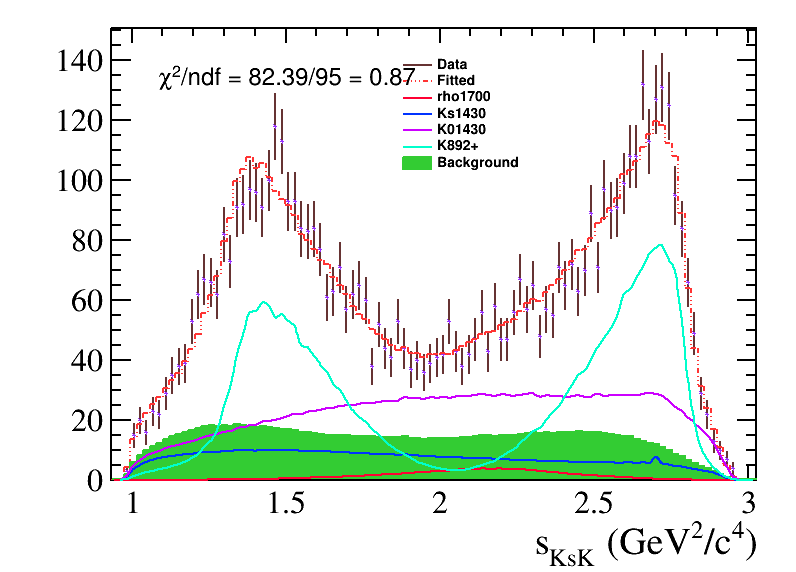

In [50]:
colors = [ROOT.kPink+7, ROOT.kBlue-2, ROOT.kGreen-1, ROOT.kYellow+3, ROOT.kCyan-1, ROOT.kMagenta, ROOT.kOrange, ROOT.kPink, ROOT.kAzure, ROOT.kViolet, ROOT.kTeal, ROOT.kSpring, ROOT.kGray, ROOT.kWhite, ROOT.kBlack]
Title_list = ["s_{KsK} (GeV^{2}/c^{4})", "s_{Ks#pi} (GeV^{2}/c^{4})", "s_{K#pi} (GeV^{2}/c^{4})"]
ROOT.lhcbStyle()
c = ROOT.TCanvas("c", "c", 800, 600)
for i, var in enumerate(var_name):
    th1f_data[var].Draw("EP")
    th1f_data[var].SetLineColor(ROOT.kRed-1)
    th1f_data[var].SetMarkerStyle(30)
    th1f_data[var].SetMarkerSize(0.5)
    th1f_data[var].SetMarkerColor(ROOT.kViolet + 1)
    th1f_data[var].GetXaxis().SetTitle(Title_list[i])
    th1f_data[var].GetYaxis().SetTitle("Events")
    th1f_data[var].GetYaxis().SetTitleOffset(1.5)
    th1f_data[var].SetTitle("Data")
    th1f_bkg[var].SetLineColor(ROOT.kGreen -3)
    th1f_bkg[var].SetFillColor(ROOT.kGreen -3)

    th1f_pdf[var].SetLineColor(ROOT.kRed - 4)
    th1f_pdf[var].SetLineStyle(6)


    THstack = ROOT.THStack("THstack", "THstack")


    THstack.Add(th1f_bkg[var])
    THstack.Add(th1f_pdf[var])



    THstack.Draw("HIST SAME")
    for idx, amp_i in enumerate(alllist['amp']):
        if th1f_amp[var][amp_i].Integral() < 100:continue
        th1f_amp[var][amp_i].SetLineColor(colors[idx])
        th1f_amp[var][amp_i].SetLineWidth(2)
        th1f_amp[var][amp_i].Draw("HISTC SAME")

        #THstack.Add(th1f_amp[var][amp_i])

    Leg = ROOT.TLegend(0.5, 0.7, 0.7, 0.9)
    Leg.AddEntry(th1f_data[var], "Data", "L")
    Leg.AddEntry(th1f_pdf[var], "Fitted", "L")

    idx=0

    for idx, amp_i in enumerate(alllist['amp']):
        if th1f_amp[var][amp_i].Integral() < 100:continue
        Leg.AddEntry(th1f_amp[var][amp_i], amp_name_list[idx], "L")

    Leg.AddEntry(th1f_bkg[var], "Background", "F")

    Leg.Draw("SAME")
    # Create a TLatex object
    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextFont(42)
    latex.SetTextSize(0.045)
    latex.SetTextColor(ROOT.kBlack)
    latex.SetTextAlign(11)

    chi2_ndf = chisa[var] / valid_bin[var] if valid_bin[var] != 0 else 0  
    latex.DrawLatex(0.2, 0.85, f"#chi^{{2}}/ndf = {chisa[var]:.2f}/{valid_bin[var]} = {chi2_ndf:.2f}")

    c.Draw()
    c.SaveAs(f"Fitted_plots_{var}.pdf")